In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv(r"F:/Datasets/Spam text.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.rename(columns={'Message':'text'},inplace=True)

In [4]:
df=pd.DataFrame(data.text)
df.head()

,text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.text=df.text.str.lower()

In [6]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
def remove_punctuation(text):
    text_nopuct=''.join([c
                        for c in text
                        if c not in string.punctuation])
    return text_nopuct

In [8]:
df.text=df.text.apply(lambda x:remove_punctuation(x))

In [9]:
df.text=df.text.str.replace(r'http\S+/www.\S+','',case=False)

In [10]:
df.text=df.text.str.replace('\d+','')

In [11]:
import nltk
from nltk.corpus import stopwords
stop=stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
df.text=df.text.apply(lambda x:''.join([abc
                                       for abc in x.split()
                                       if abc not in (stop)]))


In [13]:
import re
word=set(nltk.corpus.words.words())
word

{'visceralgia',
 'asthenopia',
 'unfavorableness',
 'musquash',
 'batophobia',
 'Plumatellidae',
 'Haliaeetus',
 'ethylenoid',
 'mongrel',
 'gramme',
 'attentive',
 'candlestand',
 'pentanedione',
 'uninvestigative',
 'chloriodide',
 'overfancy',
 'abevacuation',
 'poultryless',
 'antimasquer',
 'harper',
 'tribuneship',
 'engraphic',
 'Bobadilish',
 'exposedness',
 'Argyrol',
 'Febronian',
 'crowner',
 'deformalize',
 'Cymbium',
 'jammy',
 'predelay',
 'unversedness',
 'zoograft',
 'neritoid',
 'macroanalyst',
 'affronting',
 'pompilid',
 'javali',
 'Quakerdom',
 'silverskin',
 'monopsony',
 'desmectasia',
 'Erysiphe',
 'epifascial',
 'hornwort',
 'norma',
 'chemosynthetic',
 'isobar',
 'piecing',
 'radish',
 'overcircumspect',
 'kolhoz',
 'sundial',
 'unsecret',
 'unsnaffled',
 'empasm',
 'introdden',
 'plastomere',
 'meningosis',
 'phasogeneous',
 'plicater',
 'popeism',
 'upbrow',
 'retrievement',
 'bullet',
 'pliably',
 'chewbark',
 'ironist',
 'batzen',
 'reverseless',
 'dar',
 '

In [1]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.''' 
    text =  re.sub(r"\b[a-zA-Z]\b", "", text)
    #text =  re.sub('other words to remove','', text) 
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  
                      if w.lower() in word)     
    return text

In [15]:
data = pd.DataFrame(data.text.apply(lambda x: clean_text_round2(x)))

In [16]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
w_tokenizer = nltk.tokenize.WhitespaceTokenizer() 

In [17]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") for w in w_tokenizer.tokenize(text)]

In [18]:
data.text = data.text.apply(lambda x :' '.join(lemmatize_text(x)))

In [19]:
data['text'] = (data['text'].astype("str").str.rstrip())

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english') 
data_cv = cv.fit_transform(data.text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) 
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,5562,5563,5564,5565,5566,5567,5568,5569,5570,5571
abbey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdomen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abnormally,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,5563,5564,5565,5566,5567,5568,5569,5570,5571,freq
abbey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abdomen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
ability,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
abnormally,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,5563,5564,5565,5566,5567,5568,5569,5570,5571,freq
0,abbey,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,abdomen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,ability,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,26
4,abnormally,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
tdm1=tdm[["index","freq"]] 
tdm1.rename(columns = {'index':'Word'}, inplace = True)  
tdm1.sort_values(by='freq',ascending=False,inplace=True)
tdm1.head(20)

,Word,freq
1488,just,374
555,come,330
1112,free,284
1514,know,279
2439,send,274
2871,time,251
1572,like,247
1195,good,247
708,day,232
1626,love,229


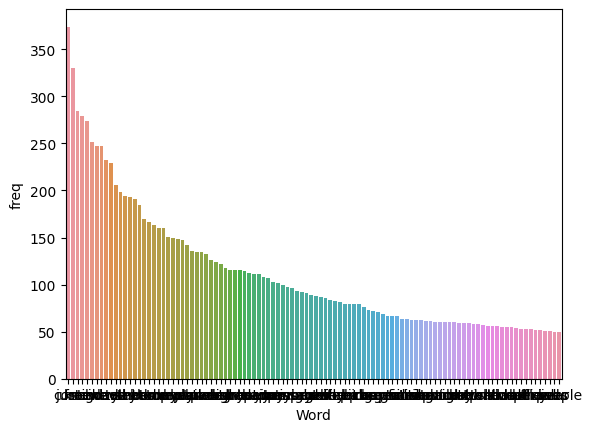

In [26]:
import seaborn as sns
w = tdm1[tdm1['freq'] >=50] 
fg = sns.barplot(x='Word', y='freq',data=w)

In [27]:
text = " ".join(review for review in data.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 265512 words in the combination of all review.


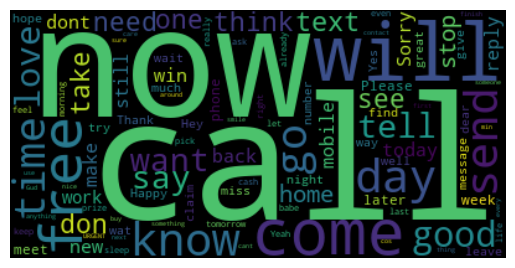

In [28]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="black",
                      collocations=False,
                       max_words=100).generate(text)
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.show()

In [29]:
df

,text
0,gojurongpointcrazyavailablebugisngreatworldlae...
1,oklarjokingwifuoni
2,freeentry2wklycompwinfacupfinaltkts21stmay2005...
3,udunsayearlyhorucalreadysay
4,nahdontthinkgoesusflivesaroundthough
...,...
5567,2ndtimetried2contactuu£750poundprize2claimeasy...
5568,übgoingesplanadefrhome
5569,pitymoodsoanysuggestions
5570,guybitchingactedlikeidinterestedbuyingsomethin...


In [32]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity 
data['polarity'] = data['text'].apply(pol)
data.head(5)

,text,polarity
0,until point crazy Available only great world b...,0.15
1,lar,0.00
2,Free entry win Cup final May Text receive entr...,0.40
3,dun say early already then say,0.10
4,don think go around here though,0.00


In [33]:
data['Sentiment'] = np.where(data['polarity']>= 0, 'Positive', 'Negative')
data.head()

,text,polarity,Sentiment
0,until point crazy Available only great world b...,0.15,Positive
1,lar,0.00,Positive
2,Free entry win Cup final May Text receive entr...,0.40,Positive
3,dun say early already then say,0.10,Positive
4,don think go around here though,0.00,Positive


<Axes: xlabel='Sentiment'>

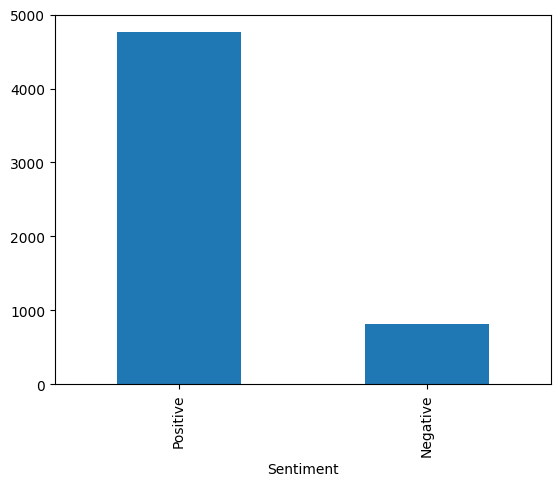

In [34]:
data.Sentiment.value_counts().plot.bar()

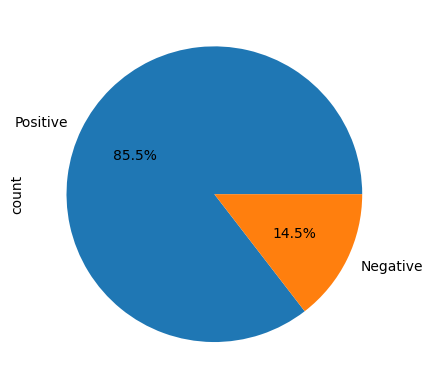

In [35]:
data.Sentiment.value_counts().plot.pie(autopct="%.1f%%");

FINISH